In [220]:
# importing necessary libraries.
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import numpy as np
import glob

In [221]:
bowler_t20 = pd.read_csv("C:\\Users\\SATWIK M BADIGER\\Desktop\\final.csv")
bowler_t20.head(20)

,Player,Team,Span,Mat,Inns,NO,Bat_Runs,HS,Ave,BF,...,Bowl_Inns,Overs,Mdns,Bowl_Runs,Wkts,Bowl_Ave,Econ,Bowl_SSR,St,D/I
0,V Kohli,INDIA,2010-2019,75,70,20,2633,94*,52.66,1907,...,12,24.2,0,198,4,49.50,8.13,36.5,0,0.493
1,RG Sharma,INDIA,2007-2019,104,96,14,2633,118,32.10,1905,...,9,11.2,0,113,1,113.00,9.97,68.0,0,0.365
2,MJ Guptill,NEW ZEALAND,2009-2019,83,80,7,2436,105,33.36,1810,...,1,1.0,0,11,0,0.00,11.00,0.0,0,0.560
3,Shoaib Malik,PAKISTAN,2006-2019,111,104,30,2263,75,30.58,1824,...,46,90.0,0,644,28,23.00,7.15,19.2,0,0.450
4,BB McCullum,NEW ZEALAND,2005-2015,71,70,10,2140,123,35.66,1571,...,0,0.0,0,0,0,0.00,0.00,0.0,8,0.619
5,DA Warner,AUSTRALIA,2009-2019,76,76,8,2079,100*,30.57,1476,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.565
6,EJG Morgan,ENGLAND,2009-2019,86,84,17,2002,91,29.88,1475,...,0,0.0,0,0,0,0.00,0.00,0.0,0,0.430
7,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,28,0.830
8,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,19,48.1,0,411,13,31.61,8.53,22.2,0,0.050
9,Mohammad Shahzad,AFGHANISTAN,2010-2018,65,65,3,1936,118*,31.22,1436,...,0,0.0,0,0,0,0.00,0.00,0.0,28,0.830


In [222]:
features = ['Player','Bowl_Ave','Bowl_SSR','Wkts', 'Econ','Team','Overs','Mdns'] # features considered.
bowler_t20 = bowler_t20.dropna(subset=features) # remove rows not dont have numerical value from the features.
bowler_t20 = bowler_t20[features].copy()
bowler_t20

,Player,Bowl_Ave,Bowl_SSR,Wkts,Econ,Team,Overs,Mdns
0,V Kohli,49.5,36.5,4,8.13,INDIA,24.2,0
1,RG Sharma,113.0,68.0,1,9.97,INDIA,11.2,0
2,MJ Guptill,0.0,0.0,0,11.00,NEW ZEALAND,1.0,0
3,Shoaib Malik,23.0,19.2,28,7.15,PAKISTAN,90.0,0
4,BB McCullum,0.0,0.0,0,0.00,NEW ZEALAND,0.0,0
...,...,...,...,...,...,...,...,...
2099,RazaurRehman,29.0,27.0,2,6.44,0,9.0,0
2100,ImamulHaq,0.0,0.0,0,0.00,0,0.0,0
2101,InzamamulHaq,0.0,0.0,0,0.00,0,0.0,0
2102,MisbahulHaq,0.0,0.0,0,0.00,0,0.0,0


In [223]:
bowler_t20 = bowler_t20.dropna() # removing incorrect data
bowler_t20

,Player,Bowl_Ave,Bowl_SSR,Wkts,Econ,Team,Overs,Mdns
0,V Kohli,49.5,36.5,4,8.13,INDIA,24.2,0
1,RG Sharma,113.0,68.0,1,9.97,INDIA,11.2,0
2,MJ Guptill,0.0,0.0,0,11.00,NEW ZEALAND,1.0,0
3,Shoaib Malik,23.0,19.2,28,7.15,PAKISTAN,90.0,0
4,BB McCullum,0.0,0.0,0,0.00,NEW ZEALAND,0.0,0
...,...,...,...,...,...,...,...,...
2099,RazaurRehman,29.0,27.0,2,6.44,0,9.0,0
2100,ImamulHaq,0.0,0.0,0,0.00,0,0.0,0
2101,InzamamulHaq,0.0,0.0,0,0.00,0,0.0,0
2102,MisbahulHaq,0.0,0.0,0,0.00,0,0.0,0


In [224]:
# scaling the data.
scaler = StandardScaler()
features = ['Wkts','Econ','Bowl_Ave','Bowl_SSR','Overs','Mdns']
scaled_data = pd.DataFrame( scaler.fit_transform(bowler_t20[features]) , columns = features )
df = PCA(2).fit_transform(scaled_data)
scaled_data

,Wkts,Econ,Bowl_Ave,Bowl_SSR,Overs,Mdns
0,-0.154898,0.657367,1.866716,1.772908,0.170560,-0.345024
1,-0.414240,1.085312,5.346777,4.063953,-0.206883,-0.345024
2,-0.500687,1.324868,-0.846088,-0.881794,-0.503030,-0.345024
3,1.919833,0.429440,0.414407,0.514652,2.081001,-0.345024
4,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024
...,...,...,...,...,...,...
2099,-0.327792,0.264309,0.743231,1.081958,-0.270758,-0.345024
2100,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024
2101,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024
2102,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024


In [225]:
''' To find how many clusers are to be formed '''
def elbow_plot( min_k, max_k, k_max_iter):
    sum_squared_distances = []
    k_range = range(min_k,max_k+1)
    for k in k_range:
        km = KMeans(n_clusters=k, max_iter=k_max_iter, n_init=50)
        km.fit(df)
        sum_squared_distances.append(km.inertia_)
        
    # Plot the score for each value of k
    plt.plot(k_range, sum_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum of squared distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()

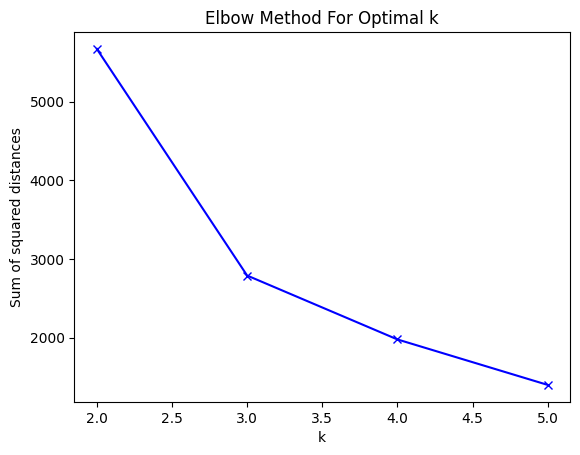

In [226]:
elbow_plot(2,5,50)

In [227]:
# Clustering the players using k-means algorithm
km = KMeans(n_clusters=4,n_init=50)
label = km.fit_predict(df)
scaled_data['Cluster'] = km.labels_ # assigning the cluster number for each datapoint in the dataframe.
scaled_data['Cluster'].value_counts()
label

array([3, 3, 2, ..., 2, 2, 2])

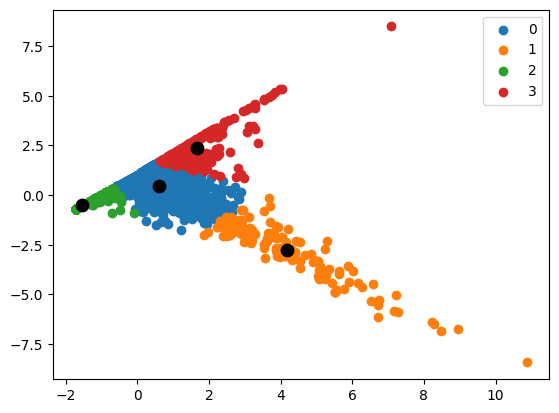

In [228]:
centroids = km.cluster_centers_
u_labels = np.unique(label)
for i in u_labels:
    plt.scatter(df[label==i,0],df[label==i,1], label=i)
plt.scatter(centroids[:,0], centroids[:,1], s=80, color = 'k')
plt.legend()
plt.show()

In [229]:
scaled_data.insert(0,'Player',bowler_t20['Player']) # adding player name to the cluster...
scaled_data.insert(1,'Team',bowler_t20['Team'])
# scaled_data

In [230]:
# spliting the dataframe into diffrent clusters.
b0 = scaled_data.loc[scaled_data['Cluster']==0]
b1 = scaled_data.loc[scaled_data['Cluster']==1]
b2 = scaled_data.loc[scaled_data['Cluster']==2]
b3 = scaled_data.loc[scaled_data['Cluster']==3]

In [231]:
len(b0),len(b1),len(b2),len(b3)

(818, 137, 934, 215)

In [232]:
b0

,Player,Team,Wkts,Econ,Bowl_Ave,Bowl_SSR,Overs,Mdns,Cluster
3,Shoaib Malik,PAKISTAN,1.919833,0.429440,0.414407,0.514652,2.081001,-0.345024,0
7,Mohammad Shahzad,AFGHANISTAN,0.623126,0.750398,0.886270,0.732847,0.864474,-0.345024,0
8,Mohammad Shahzad,AFGHANISTAN,0.623126,0.750398,0.886270,0.732847,0.864474,-0.345024,0
11,Mohammad Shahzad,UAE,0.623126,0.750398,0.886270,0.732847,0.864474,-0.345024,0
12,Mohammad Shahzad,UAE,0.623126,0.750398,0.886270,0.732847,0.864474,-0.345024,0
...,...,...,...,...,...,...,...,...,...
2095,NaveenulHaq,0,0.104443,0.348037,-0.047592,0.049170,-0.096553,-0.345024,0
2096,NavedulHasan,0,-0.068451,0.422462,0.260955,0.354642,-0.122684,-0.345024,0
2097,M SimpsonParker,0,-0.241345,0.627132,-0.115549,-0.154479,-0.386894,-0.345024,0
2098,LHB HarringtonMyers,0,-0.327792,0.278263,-0.133635,-0.009015,-0.415928,-0.345024,0


In [233]:
b1

,Player,Team,Wkts,Econ,Bowl_Ave,Bowl_SSR,Overs,Mdns,Cluster
17,Mohammad Hafeez,PAKISTAN,4.167459,0.296870,0.397965,0.616476,4.871175,2.630101,1
31,Shakib Al Hasan,BANGLADESH,7.452450,0.350363,0.281781,0.434647,7.524888,2.630101,1
35,KJ O'Brien,IRELAND,4.513248,0.517820,0.225332,0.245545,3.831755,-0.345024,1
38,SR Watson,AUSTRALIA,3.648776,0.545729,0.508670,0.521925,3.968215,2.630101,1
39,Mahmudullah,BANGLADESH,2.179175,0.464326,0.675822,0.776486,2.879438,2.630101,1
...,...,...,...,...,...,...,...,...,...
1642,YS Chahal,INDIA,3.994565,0.650390,0.354122,0.296457,3.541415,1.142538,1
1757,LL Tsotsobe,SOUTH AFRICA,1.055362,0.378272,0.800776,1.009227,1.732593,2.630101,1
1787,AC Evans,SCOTLAND,2.611410,0.487584,0.202315,0.245545,2.168104,5.605225,1
2090,AlAmin Hossain,0,2.957199,0.478281,0.075717,0.114628,2.115842,-0.345024,1


In [234]:
b2

,Player,Team,Wkts,Econ,Bowl_Ave,Bowl_SSR,Overs,Mdns,Cluster
2,MJ Guptill,NEW ZEALAND,-0.500687,1.324868,-0.846088,-0.881794,-0.503030,-0.345024,2
4,BB McCullum,NEW ZEALAND,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
5,DA Warner,AUSTRALIA,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
6,EJG Morgan,ENGLAND,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
9,Mohammad Shahzad,AFGHANISTAN,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
...,...,...,...,...,...,...,...,...,...
2085,SR Welsh,CANADA,-0.327792,-0.768342,-0.681676,-0.227210,-0.444962,-0.345024,2
2100,ImamulHaq,0,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
2101,InzamamulHaq,0,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2
2102,MisbahulHaq,0,-0.500687,-1.233499,-0.846088,-0.881794,-0.532064,-0.345024,2


In [235]:
b3

,Player,Team,Wkts,Econ,Bowl_Ave,Bowl_SSR,Overs,Mdns,Cluster
0,V Kohli,INDIA,-0.154898,0.657367,1.866716,1.772908,0.170560,-0.345024,3
1,RG Sharma,INDIA,-0.414240,1.085312,5.346777,4.063953,-0.206883,-0.345024,3
23,H Masakadza,ZIMBABWE,-0.327792,0.955068,2.250345,1.736542,-0.183656,-0.345024,3
32,C Munro,NEW ZEALAND,-0.154898,0.964371,1.702303,1.263787,0.031196,-0.345024,3
53,KP Pietersen,ENGLAND,-0.414240,1.231837,2.058530,1.300153,-0.386894,-0.345024,3
...,...,...,...,...,...,...,...,...,...
2015,WT Mashinge,ZIMBABWE,-0.414240,1.417900,2.277747,1.300153,-0.386894,-0.345024,3
2021,Mohammed Siraj,INDIA,-0.241345,1.634198,1.857399,0.863764,-0.183656,-0.345024,3
2041,MA Parker,SCOTLAND,-0.414240,1.129502,2.496963,1.736542,-0.357860,-0.345024,3
2043,AY Patel,NEW ZEALAND,-0.414240,0.510842,1.620097,1.736542,-0.357860,-0.345024,3


In [242]:
def cluster_data(data, column_name ,value):
    return( data[data[column_name] == value])

column_name = 'Team'
column_value = 'INDIA'
result = cluster_data(b1, column_name ,column_value)

print(result)

               Player   Team      Wkts      Econ  Bowl_Ave  Bowl_SSR  \
231         HH Pandya  INDIA  2.784305  0.708534  0.561282  0.456467   
392         IK Pathan  INDIA  1.919833  0.631783  0.363439  0.318277   
402         RA Jadeja  INDIA  2.524963  0.436417  0.864896  1.009227   
497          R Ashwin  INDIA  3.994565  0.387575  0.411118  0.551018   
549   Harbhajan Singh  INDIA  1.660492  0.208490  0.541552  0.892856   
1078          A Nehra  INDIA  2.438516  0.564335  0.375496  0.369189   
1156          B Kumar  INDIA  3.043646  0.403856  0.607865  0.754666   
1209    Kuldeep Yadav  INDIA  2.697858  0.387575 -0.107329 -0.045381   
1509        JJ Bumrah  INDIA  3.908118  0.327105  0.259311  0.427374   
1642        YS Chahal  INDIA  3.994565  0.650390  0.354122  0.296457   

         Overs      Mdns  Cluster  
231   2.850404  1.142538        1  
392   1.703558  1.142538        1  
402   3.884017  5.605225        1  
497   4.432760  2.630101        1  
549   2.429410  7.092787   